_Lambda School Data Science — Applied Modeling_ 

This sprint, your project is Caterpillar Tube Pricing: Predict the prices suppliers will quote for industrial tube assemblies.

# Gradient Boosting


#### Objectives
- Do feature engineering with relational data
- Use xgboost for gradient boosting

#### Python libraries for Gradient Boosting
- [scikit-learn Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) — slower than other libraries, but [the new version may be better](https://twitter.com/amuellerml/status/1129443826945396737)
  - Anaconda: already installed
  - Google Colab: already installed
- [xgboost](https://xgboost.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://xiaoxiaowang87.github.io/monotonicity_constraint/)
  - Anaconda, Mac/Linux: `conda install -c conda-forge xgboost`
  - Windows: `conda install -c anaconda py-xgboost`
  - Google Colab: already installed
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://blog.datadive.net/monotonicity-constraints-in-machine-learning/)
  - Anaconda: `conda install -c conda-forge lightgbm`
  - Google Colab: already installed
- [CatBoost](https://catboost.ai/) — can accept missing values and use [categorical features](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html) without preprocessing
  - Anaconda: `conda install -c conda-forge catboost`
  - Google Colab: `pip install catboost`

### Get data


#### Option 1. Kaggle web UI
 
Sign in to Kaggle and go to the [Caterpillar Tube Pricing](https://www.kaggle.com/c/caterpillar-tube-pricing) competition. Go to the Data page. After you have accepted the rules of the competition, use the download buttons to download the data.


#### Option 2. Kaggle API

Follow these [instructions](https://github.com/Kaggle/kaggle-api).

#### Option 3. GitHub Repo — LOCAL

If you are working locally:

1. Clone the [GitHub repo](https://github.com/LambdaSchool/DS-Unit-2-Applied-Modeling/tree/master/data/caterpillar) locally. The data is in the repo, so you don't need to download it separately.

2. Unzip the file `caterpillar-tube-pricing.zip` which is in the data folder of your local repo.

3. Unzip the file `data.zip`. 

4. Run the cell below to assign a constant named `SOURCE`, a string that points to the location of the data on your local machine. The rest of the code in the notebook will use this constant.

In [8]:
SOURCE = '../data/caterpillar/caterpillar-tube-pricing/competition_data/'

#### Option 4. GitHub Repo — COLAB

If you are working on Google Colab, uncomment and run these cells, to download the data, unzip it, and assign a constant that points to the location of the data.

In [9]:
#!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip

In [10]:
#!unzip -o caterpillar-tube-pricing.zip   #-o overwrites

In [11]:
#!unzip data.zip

In [12]:
SOURCE = 'competition_data/'

## Do feature engineering with relational data

Here are some questions — not answers!

### `bill_of_materials`

is formatted like this:

In [13]:
import pandas as pd
materials = pd.read_csv(SOURCE + 'bill_of_materials.csv') #components that make up each tube_assembly_id
materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
materials.describe(exclude='number')

,tube_assembly_id,component_id_1,component_id_2,component_id_3,component_id_4,component_id_5,component_id_6,component_id_7,component_id_8
count,21198,19149,14786,4791,607,92,26,7,1
unique,21198,1079,834,509,204,62,19,4,1
top,TA-16013,C-1621,C-1628,C-1641,C-1660,C-0872,C-0923,C-1019,C-1981
freq,1,2043,1959,421,62,10,3,3,1


In [15]:
materials.isnull().sum()/len(materials)

tube_assembly_id    0.000000
component_id_1      0.096660
quantity_1          0.096660
component_id_2      0.302481
quantity_2          0.302481
component_id_3      0.773988
quantity_3          0.773658
component_id_4      0.971365
quantity_4          0.971318
component_id_5      0.995660
quantity_5          0.995660
component_id_6      0.998773
quantity_6          0.998773
component_id_7      0.999670
quantity_7          0.999670
component_id_8      0.999953
quantity_8          0.999953
dtype: float64

#### Would this be a better representation?

Could pandas melt, crosstab, and other functions help reshape the data like this?

| Crosstab | C-1622 | C-1629 | C-1312 | C-1624 | C-1631 | C-1641 | Distinct | Total |
|:--------:|:------:|--------|--------|--------|--------|--------|----------|-------|
| TA-00001 | 2      | 2      | 0      | 0      | 0      | 0      | 2        | 4     |
| TA-00002 | 0      | 0      | 2      | 0      | 0      | 0      | 1        | 2     |
| TA-00003 | 0      | 0      | 2      | 0      | 0      | 0      | 1        | 2     |
| TA-00004 | 0      | 0      | 2      | 0      | 0      | 0      | 1        | 2     |
| TA-00005 | 0      | 0      | 0      | 1      | 1      | 1      | 3        | 3     |

### `components`

Contains three representations of each component, in order of decreasing cardinality / granularity:

- `component_id`
- `name`
- `component_type_id`

What are the pros & cons of these different representations?

In [16]:
components = pd.read_csv(SOURCE + 'components.csv')
components.describe()

,component_id,name,component_type_id
count,2048,2047,2048
unique,2048,297,29
top,C-1369,FLANGE,OTHER
freq,1,350,1006


In [17]:
components.head()

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026


In [18]:
components['name'].nunique()

297

### Tip/trick: Want to read all the files at once?

In [23]:
from glob import glob
glob(SOURCE + '*.csv')

['competition_data/comp_tee.csv',
 'competition_data/train_set.csv',
 'competition_data/comp_float.csv',
 'competition_data/specs.csv',
 'competition_data/comp_other.csv',
 'competition_data/comp_boss.csv',
 'competition_data/bill_of_materials.csv',
 'competition_data/comp_sleeve.csv',
 'competition_data/type_component.csv',
 'competition_data/comp_elbow.csv',
 'competition_data/components.csv',
 'competition_data/comp_threaded.csv',
 'competition_data/type_connection.csv',
 'competition_data/tube.csv',
 'competition_data/type_end_form.csv',
 'competition_data/test_set.csv',
 'competition_data/comp_adaptor.csv',
 'competition_data/comp_nut.csv',
 'competition_data/tube_end_form.csv',
 'competition_data/comp_hfl.csv',
 'competition_data/comp_straight.csv']

In [24]:
'competition_data/comp_tee.csv'.split('/')

['competition_data', 'comp_tee.csv']

In [25]:
from glob import glob

data = {}
for path in glob(SOURCE + '*.csv'):
    df = pd.read_csv(path)
    filename = path.split('/')[-1]
    name = filename.split('.')[0]
    data[name] = df

In [26]:
data.keys()

dict_keys(['comp_tee', 'train_set', 'comp_float', 'specs', 'comp_other', 'comp_boss', 'bill_of_materials', 'comp_sleeve', 'type_component', 'comp_elbow', 'components', 'comp_threaded', 'type_connection', 'tube', 'type_end_form', 'test_set', 'comp_adaptor', 'comp_nut', 'tube_end_form', 'comp_hfl', 'comp_straight'])

In [29]:
data['comp_sleeve'].head()

,component_id,component_type_id,connection_type_id,length,intended_nut_thread,intended_nut_pitch,unique_feature,plating,orientation,weight
0,C-0001,CP-024,B-001,17.3,1.062,12,No,No,No,0.013
1,C-0002,CP-024,B-001,11.2,0.500,20,No,No,No,0.005
2,C-0003,CP-024,B-001,19.3,1.187,12,No,No,No,0.014
3,C-0048,CP-024,B-002,9.5,0.562,18,No,No,No,0.006
4,C-0049,CP-024,B-002,9.5,0.812,16,No,No,No,0.012


## Example solution for last assignment 🚜

In [28]:
# !pip install category_encoders

In [31]:
data['bill_of_materials'].head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge tube data
    tube = pd.read_csv(SOURCE + 'tube.csv')
    X = X.merge(tube, how='left')
    
    # Engineer features from bill_of_materials
    materials = pd.read_csv(SOURCE + 'bill_of_materials.csv')
    
    materials['components_total'] = (materials['quantity_1'].fillna(0) + 
                                     materials['quantity_2'].fillna(0) + 
                                     materials['quantity_3'].fillna(0) + 
                                     materials['quantity_4'].fillna(0) + 
                                     materials['quantity_5'].fillna(0) + 
                                     materials['quantity_6'].fillna(0) + 
                                     materials['quantity_7'].fillna(0) + 
                                     materials['quantity_8'].fillna(0))

    materials['components_distinct'] = (materials['component_id_1'].notnull().astype(int) + 
                                        materials['component_id_2'].notnull().astype(int) + 
                                        materials['component_id_3'].notnull().astype(int) + 
                                        materials['component_id_4'].notnull().astype(int) + 
                                        materials['component_id_5'].notnull().astype(int) + 
                                        materials['component_id_6'].notnull().astype(int) + 
                                        materials['component_id_7'].notnull().astype(int) + 
                                        materials['component_id_8'].notnull().astype(int))
    
    # Merge selected features from bill_of_materials
    # Just use the first component_id, ignore the others for now!
    features = ['tube_assembly_id', 'component_id_1', 'components_total', 'components_distinct']
    X = X.merge(materials[features], how='left')
    
    # Get component_type_id (has lower cardinality than component_id)
    components = pd.read_csv(SOURCE + 'components.csv')
    components = components.rename(columns={'component_id': 'component_id_1'})
    features = ['component_id_1', 'component_type_id']
    X = X.merge(components[features], how='left')
    
    # Count the number of specs for the tube assembly
    specs = pd.read_csv(SOURCE + 'specs.csv')
    specs['specs_total'] = specs.drop(columns=['tube_assembly_id']).count(axis=1)
    features = ['tube_assembly_id', 'specs_total', 'spec1']
    X = X.merge(specs[features], how='left')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X


# Read data
trainval = pd.read_csv(SOURCE + 'train_set.csv')
test = pd.read_csv(SOURCE + 'test_set.csv')

# Split into train & validation sets
# All rows for a given tube_assembly_id should go in either train or validation
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42)
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)]
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)]

# Wrangle train, validation, and test sets
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

# Arrange X matrix and y vector (log-transformed)
target = 'cost'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns='id')
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [35]:
#%%time

# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

# Predict
def generate_submission(estimator, X_test, filename):
    y_pred_log = estimator.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Convert from log-dollars to dollars
    submission = pd.read_csv(SOURCE + '../sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
generate_submission(pipeline, X_test, 'submission-02.csv')

Validation Error 0.29689405271419284


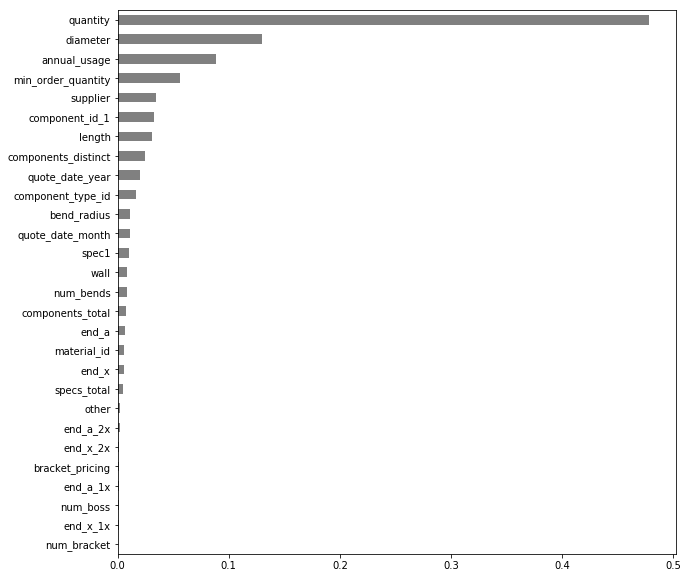

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');

## Use xgboost for gradient boosting

#### [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

In [49]:
from xgboost import XGBRegressor

# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=1000, n_jobs=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)  #xgboost library does not support scikit learn's api
                                    # perfectly. Notice if you try to add extra fit parameters
                                    # pipeline doesn't know how to handle it. Google "xgboost
                                    # scikitlearn pipeline"

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

/home/martin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Error 0.2700581596577784


#### Jason Brownlee, [Avoid Overfitting By Early Stopping With XGBoost In Python](https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/)

In [50]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [51]:
eval_set = [
    (X_train_encoded, y_train_log),
    (X_val_encoded, y_val_log)
]

In [1]:
model = XGBRegressor(n_estimators=1000, n_jobs=-1)

model.fit(X_train_encoded,
         y_train_log,
         eval_set=eval_set,
         eval_metric='rmse',
         early_stopping_rounds=10
         )

NameError: name 'XGBRegressor' is not defined

(0.2, 0.4)

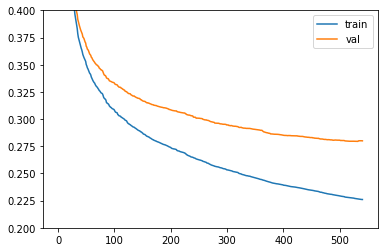

In [56]:
results = model.evals_result()

train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']

epochs = range(0, len(train_rmse))

plt.plot(epochs, train_rmse, label='train')
plt.plot(epochs, val_rmse, label='val')
plt.legend();
plt.ylim(0.2, 0.4)

In [64]:
#Show result with catboost

from catboost import CatBoostRegressor

# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    CatBoostRegressor(learning_rate = 0.3)
)

# Fit
pipeline.fit(X_train, y_train_log)  #xgboost library does not support scikit learn's api
                                    # perfectly. Notice if you try to add extra fit parameters
                                    # pipeline doesn't know how to handle it. Google "xgboost
                                    # scikitlearn pipeline"

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

0:	learn: 1.7063512	total: 8.42ms	remaining: 8.41s
1:	learn: 1.2756902	total: 18.2ms	remaining: 9.06s
2:	learn: 0.9694022	total: 29.1ms	remaining: 9.68s
3:	learn: 0.7520570	total: 41ms	remaining: 10.2s
4:	learn: 0.6097303	total: 49.7ms	remaining: 9.88s
5:	learn: 0.5294796	total: 58.2ms	remaining: 9.65s
6:	learn: 0.4657627	total: 64.8ms	remaining: 9.2s
7:	learn: 0.4252448	total: 73.1ms	remaining: 9.06s
8:	learn: 0.3983808	total: 83ms	remaining: 9.14s
9:	learn: 0.3842124	total: 94.9ms	remaining: 9.4s
10:	learn: 0.3694200	total: 105ms	remaining: 9.48s
11:	learn: 0.3633047	total: 115ms	remaining: 9.47s
12:	learn: 0.3547063	total: 125ms	remaining: 9.51s
13:	learn: 0.3488532	total: 135ms	remaining: 9.48s
14:	learn: 0.3437360	total: 146ms	remaining: 9.57s
15:	learn: 0.3423312	total: 155ms	remaining: 9.55s
16:	learn: 0.3399380	total: 162ms	remaining: 9.36s
17:	learn: 0.3372858	total: 170ms	remaining: 9.27s
18:	learn: 0.3322560	total: 180ms	remaining: 9.29s
19:	learn: 0.3303295	total: 189ms	rem

173:	learn: 0.2366303	total: 1.87s	remaining: 8.86s
174:	learn: 0.2365849	total: 1.88s	remaining: 8.86s
175:	learn: 0.2361720	total: 1.9s	remaining: 8.89s
176:	learn: 0.2356582	total: 1.91s	remaining: 8.88s
177:	learn: 0.2356543	total: 1.92s	remaining: 8.86s
178:	learn: 0.2356503	total: 1.93s	remaining: 8.85s
179:	learn: 0.2356497	total: 1.94s	remaining: 8.82s
180:	learn: 0.2356492	total: 1.95s	remaining: 8.8s
181:	learn: 0.2356471	total: 1.95s	remaining: 8.78s
182:	learn: 0.2356453	total: 1.96s	remaining: 8.77s
183:	learn: 0.2356434	total: 1.97s	remaining: 8.74s
184:	learn: 0.2356415	total: 1.98s	remaining: 8.74s
185:	learn: 0.2356403	total: 1.99s	remaining: 8.71s
186:	learn: 0.2355860	total: 2s	remaining: 8.7s
187:	learn: 0.2354811	total: 2.01s	remaining: 8.69s
188:	learn: 0.2353933	total: 2.02s	remaining: 8.66s
189:	learn: 0.2353783	total: 2.03s	remaining: 8.65s
190:	learn: 0.2350144	total: 2.03s	remaining: 8.62s
191:	learn: 0.2348306	total: 2.04s	remaining: 8.61s
192:	learn: 0.2348

336:	learn: 0.2224523	total: 3.5s	remaining: 6.88s
337:	learn: 0.2224484	total: 3.5s	remaining: 6.86s
338:	learn: 0.2218081	total: 3.52s	remaining: 6.86s
339:	learn: 0.2218047	total: 3.53s	remaining: 6.85s
340:	learn: 0.2218045	total: 3.54s	remaining: 6.84s
341:	learn: 0.2218037	total: 3.55s	remaining: 6.84s
342:	learn: 0.2209088	total: 3.57s	remaining: 6.83s
343:	learn: 0.2209014	total: 3.58s	remaining: 6.83s
344:	learn: 0.2209012	total: 3.59s	remaining: 6.81s
345:	learn: 0.2209010	total: 3.6s	remaining: 6.8s
346:	learn: 0.2209010	total: 3.6s	remaining: 6.77s
347:	learn: 0.2209009	total: 3.6s	remaining: 6.75s
348:	learn: 0.2208844	total: 3.62s	remaining: 6.74s
349:	learn: 0.2208843	total: 3.62s	remaining: 6.73s
350:	learn: 0.2208841	total: 3.63s	remaining: 6.72s
351:	learn: 0.2208840	total: 3.64s	remaining: 6.71s
352:	learn: 0.2208834	total: 3.65s	remaining: 6.7s
353:	learn: 0.2208833	total: 3.66s	remaining: 6.69s
354:	learn: 0.2208687	total: 3.67s	remaining: 6.67s
355:	learn: 0.22086

508:	learn: 0.2092613	total: 5.36s	remaining: 5.17s
509:	learn: 0.2086848	total: 5.37s	remaining: 5.16s
510:	learn: 0.2086723	total: 5.38s	remaining: 5.15s
511:	learn: 0.2086667	total: 5.4s	remaining: 5.15s
512:	learn: 0.2086662	total: 5.41s	remaining: 5.14s
513:	learn: 0.2086638	total: 5.42s	remaining: 5.13s
514:	learn: 0.2086590	total: 5.43s	remaining: 5.12s
515:	learn: 0.2086584	total: 5.44s	remaining: 5.1s
516:	learn: 0.2082166	total: 5.45s	remaining: 5.09s
517:	learn: 0.2082126	total: 5.46s	remaining: 5.08s
518:	learn: 0.2081978	total: 5.47s	remaining: 5.07s
519:	learn: 0.2081977	total: 5.47s	remaining: 5.05s
520:	learn: 0.2081526	total: 5.48s	remaining: 5.04s
521:	learn: 0.2081401	total: 5.49s	remaining: 5.03s
522:	learn: 0.2081326	total: 5.5s	remaining: 5.02s
523:	learn: 0.2081322	total: 5.51s	remaining: 5.01s
524:	learn: 0.2081321	total: 5.53s	remaining: 5s
525:	learn: 0.2081313	total: 5.54s	remaining: 4.99s
526:	learn: 0.2081309	total: 5.55s	remaining: 4.98s
527:	learn: 0.2081

668:	learn: 0.2031274	total: 7s	remaining: 3.46s
669:	learn: 0.2028842	total: 7.01s	remaining: 3.45s
670:	learn: 0.2028825	total: 7.02s	remaining: 3.44s
671:	learn: 0.2028819	total: 7.03s	remaining: 3.43s
672:	learn: 0.2028819	total: 7.04s	remaining: 3.42s
673:	learn: 0.2028795	total: 7.05s	remaining: 3.41s
674:	learn: 0.2028793	total: 7.06s	remaining: 3.4s
675:	learn: 0.2028392	total: 7.07s	remaining: 3.39s
676:	learn: 0.2027227	total: 7.08s	remaining: 3.38s
677:	learn: 0.2027128	total: 7.09s	remaining: 3.37s
678:	learn: 0.2027075	total: 7.11s	remaining: 3.36s
679:	learn: 0.2027066	total: 7.12s	remaining: 3.35s
680:	learn: 0.2027010	total: 7.12s	remaining: 3.34s
681:	learn: 0.2027006	total: 7.13s	remaining: 3.33s
682:	learn: 0.2027005	total: 7.14s	remaining: 3.31s
683:	learn: 0.2026957	total: 7.15s	remaining: 3.3s
684:	learn: 0.2026559	total: 7.16s	remaining: 3.29s
685:	learn: 0.2026559	total: 7.17s	remaining: 3.28s
686:	learn: 0.2026509	total: 7.18s	remaining: 3.27s
687:	learn: 0.202

843:	learn: 0.1991107	total: 8.84s	remaining: 1.63s
844:	learn: 0.1991104	total: 8.85s	remaining: 1.62s
845:	learn: 0.1987144	total: 8.87s	remaining: 1.61s
846:	learn: 0.1987072	total: 8.88s	remaining: 1.6s
847:	learn: 0.1987070	total: 8.89s	remaining: 1.59s
848:	learn: 0.1987069	total: 8.9s	remaining: 1.58s
849:	learn: 0.1987067	total: 8.91s	remaining: 1.57s
850:	learn: 0.1987037	total: 8.92s	remaining: 1.56s
851:	learn: 0.1987035	total: 8.93s	remaining: 1.55s
852:	learn: 0.1987028	total: 8.94s	remaining: 1.54s
853:	learn: 0.1987013	total: 8.95s	remaining: 1.53s
854:	learn: 0.1987012	total: 8.96s	remaining: 1.52s
855:	learn: 0.1986980	total: 8.97s	remaining: 1.51s
856:	learn: 0.1986968	total: 8.98s	remaining: 1.5s
857:	learn: 0.1986868	total: 8.99s	remaining: 1.49s
858:	learn: 0.1986850	total: 9s	remaining: 1.48s
859:	learn: 0.1986849	total: 9.01s	remaining: 1.47s
860:	learn: 0.1986849	total: 9.02s	remaining: 1.46s
861:	learn: 0.1986847	total: 9.02s	remaining: 1.44s
862:	learn: 0.1986

In [63]:
#Show result with lgbm

import lightgbm as lgbm

# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    lgbm.sklearn.LGBMRegressor(learning_rate=0.2)
)

# Fit
pipeline.fit(X_train, y_train_log)  #xgboost library does not support scikit learn's api
                                    # perfectly. Notice if you try to add extra fit parameters
                                    # pipeline doesn't know how to handle it. Google "xgboost
                                    # scikitlearn pipeline"

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 0.2672733716988669


#### Kaggle RMSLE: 0.29454

### Understand the difference between boosting & bagging

Boosting (used by Gradient Boosting) is different than Bagging (used by Random Forests). 

[_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8.2.3, Boosting:

>Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all of the trees in order to create a single predictive model.

>**Boosting works in a similar way, except that the trees are grown _sequentially_: each tree is grown using information from previously grown trees.**

>Unlike fitting a single large decision tree to the data, which amounts to _fitting the data hard_ and potentially overfitting, the boosting approach instead _learns slowly._ Given the current model, we fit a decision tree to the residuals from the model.

>We then add this new decision tree into the fitted function in order to update the residuals. Each of these trees can be rather small, with just a few terminal nodes. **By fitting small trees to the residuals, we slowly improve fˆ in areas where it does not perform well.**

>Note that in boosting, unlike in bagging, the construction of each tree depends strongly on the trees that have already been grown.

# Assignment
- Continue to participate in the [Kaggle Caterpillar competition](https://www.kaggle.com/c/caterpillar-tube-pricing).
- Do more feature engineering. 
- Use xgboost for gradient boosting.
- Submit new predictions.
- Commit your notebook to your fork of the GitHub repo.

## Stretch Goals
- Improve your scores on Kaggle.
- Make visualizations and share on Slack.
- Look at [Kaggle Kernels](https://www.kaggle.com/c/caterpillar-tube-pricing/kernels) for ideas about feature engineerng and visualization.
- Look at the bonus notebook in the repo, about Monotonic Constraints with Gradient Boosting.
- Read more about gradient boosting:
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - [Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (3 minute video)